<a href="https://colab.research.google.com/github/mounikq/datascience/blob/main/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/iris.data.csv")
data.shape

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## **Data cleaning **

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.drop('Id',inplace=True,axis=1)

In [ ]:
data.columns
cols = list(data.columns)
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# **data normalisation**

In [ ]:
range = data["SepalLengthCm"].max() - data["SepalLengthCm"].min()
range

3.6000000000000005

In [ ]:
data["SepalLengthCm"] = (data["SepalLengthCm"] - data["SepalLengthCm"].min())/range
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,3.5,1.4,0.2,Iris-setosa
1,0.166667,3.0,1.4,0.2,Iris-setosa
2,0.111111,3.2,1.3,0.2,Iris-setosa
3,0.083333,3.1,1.5,0.2,Iris-setosa
4,0.194444,3.6,1.4,0.2,Iris-setosa


In [ ]:
data["SepalLengthCm"] = data["SepalLengthCm"] / data["SepalLengthCm"].max()

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,3.5,1.4,0.2,Iris-setosa
1,0.166667,3.0,1.4,0.2,Iris-setosa
2,0.111111,3.2,1.3,0.2,Iris-setosa
3,0.083333,3.1,1.5,0.2,Iris-setosa
4,0.194444,3.6,1.4,0.2,Iris-setosa


# **Reverting**

In [ ]:
data = pd.read_csv("/content/iris.data.csv")
data.shape

(150, 6)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **plotting**


In [ ]:
group_names = data['Species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

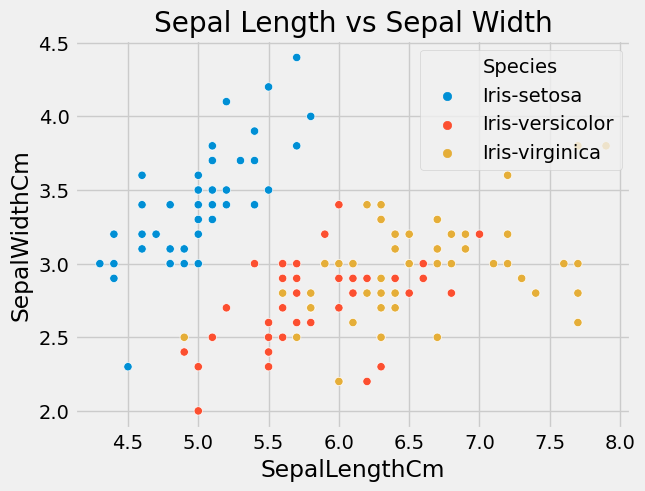

In [ ]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, hue = 'Species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [ ]:
data['SepalLengthCm'].corr(data['SepalWidthCm'])

-0.10936924995064937

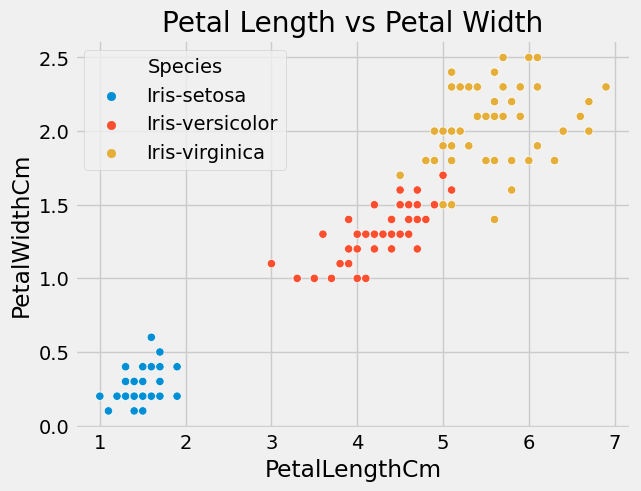

In [ ]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

In [ ]:
data['PetalLengthCm'].corr(data['PetalWidthCm'])

0.9627570970509663

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

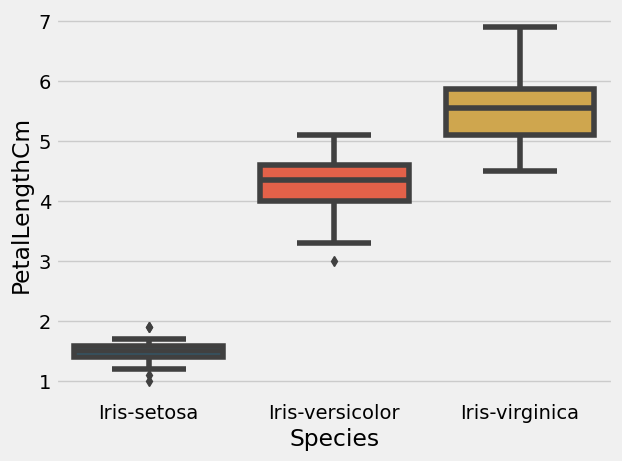

In [ ]:
sns.boxplot(x = "Species", y = "PetalLengthCm", data = data)

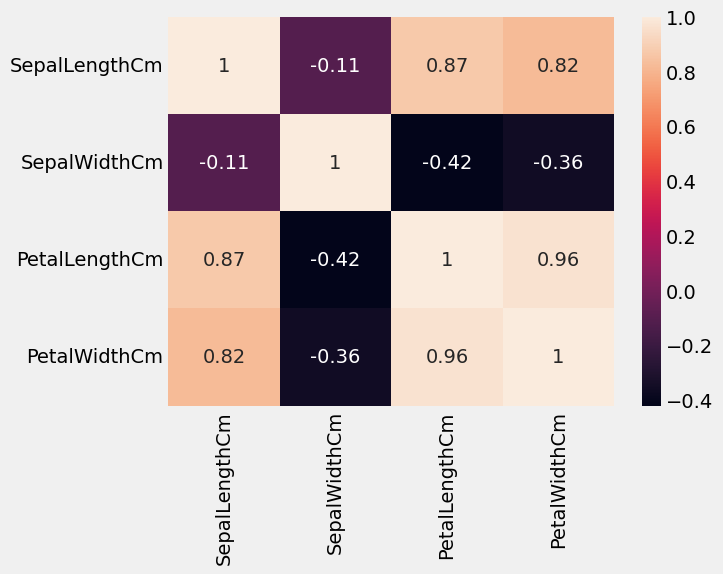

In [ ]:
no_id_data = data.copy()
no_id_data.drop("Id", axis = 1, inplace = True)
sns.heatmap(data = no_id_data.corr(), annot = True)
plt.show()

# **Linear** **Regreesion**

In [ ]:
x_values = data['PetalLengthCm'].copy()
y_values = data['PetalWidthCm'].copy()

In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
species_dummy = pd.get_dummies(data["Species"])
species_dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
assigned_data = data.copy()

In [ ]:
assigned_data = pd.concat([data, species_dummy], axis = 1)
assigned_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [ ]:
assigned_data.drop(["Id"], inplace = True, axis = 1)
assigned_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [ ]:
target = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
features = cols[0:4]
print(target)
print(features)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [ ]:
y = assigned_data[target].copy()
X = assigned_data[features].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [ ]:
print(X_train.describe())
X_train.head()

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     135.000000    135.000000     135.000000    135.000000
mean        5.869630      3.055556       3.814815      1.221481
std         0.814997      0.428581       1.746960      0.760733
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.500000      1.400000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.200000       6.700000      2.500000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
72,6.3,2.5,4.9,1.5
135,7.7,3.0,6.1,2.3
113,5.7,2.5,5.0,2.0
42,4.4,3.2,1.3,0.2


In [ ]:
y_train.head(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
40,1,0,0
72,0,1,0
135,0,0,1
113,0,0,1
42,1,0,0
126,0,0,1
112,0,0,1
141,0,0,1
76,0,1,0
5,1,0,0


In [ ]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

# **Prediction** **Test**

In [ ]:
y_prediction = iris_classifier.predict(X_test)

In [ ]:
y_prediction[0 : 10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
y_test[0:10]

,Iris-setosa,Iris-versicolor,Iris-virginica
47,1,0,0
3,1,0,0
31,1,0,0
25,1,0,0
15,1,0,0
118,0,0,1
89,0,1,0
6,1,0,0
103,0,0,1
65,0,1,0



# **Measure Accuracy of the** **Classifier**

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0